<a href="https://colab.research.google.com/github/ahmadalideeb/machine-learning/blob/master/MMO_PK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## набор данных

Департамент здравоохранения разработал отчет о проверке и систему оценки. После проведения проверки объекта Инспектор здравоохранения рассчитывает балл на основе наблюдаемых нарушений. Нарушения могут относиться к: категории высокого риска: регистрируются конкретные нарушения, которые непосредственно связаны с передачей болезней пищевого происхождения, фальсификацией пищевых продуктов и загрязнением поверхностей, контактирующих с пищевыми продуктами. Категория умеренного риска: регистрирует конкретные нарушения, которые имеют умеренный риск в категорию общественного здравоохранения и безопасности. Низкая степень риска: регистрирует нарушения, которые имеют низкий уровень риска или не имеют непосредственного риска для здоровья и безопасности населения. Счетная карточка, которая будет выдана инспектором, хранится в продовольственном учреждении и доступна для публика в этом наборе данных.Эта информация будет частью построения модели машинного обучения, которая будет предсказывать, к какой категории относится каждое учреждение.
Давайте сначала посмотрим на наш набор данных и увидим некоторые его строки.

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data = pd.read_csv('restaurant-scores-lives-standard.csv', sep=",")

In [0]:
data.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category
0,69618,Fancy Wheatfield Bakery,1362 Stockton St,San Francisco,CA,94133,NaN,NaN,NaN,NaN,69618_20190304,2019-03-04T00:00:00.000,NaN,Complaint,69618_20190304_103130,Inadequate sewage or wastewater disposal,Moderate Risk
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,1.415724e+10,97975_20190725,2019-07-25T00:00:00.000,96.0,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk
2,69487,Hakkasan San Francisco,1 Kearny St,San Francisco,CA,94108,NaN,NaN,NaN,NaN,69487_20180418,2018-04-18T00:00:00.000,88.0,Routine - Unscheduled,69487_20180418_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk
3,91044,Chopsticks Restaurant,4615 Mission St,San Francisco,CA,94112,NaN,NaN,NaN,NaN,91044_20170818,2017-08-18T00:00:00.000,NaN,Non-inspection site visit,NaN,NaN,NaN
4,85987,Tselogs,552 Jones St,San Francisco,CA,94102,NaN,NaN,NaN,NaN,85987_20180412,2018-04-12T00:00:00.000,94.0,Routine - Unscheduled,85987_20180412_103132,Improper thawing methods,Moderate Risk


In [0]:
data.shape

(53973, 17)

атрибуты набора данных с их описанием
1. **business_id**
2. **business_name**
3. **business_address**
4. **business_city**
5. **business_state**
6. **business_postal_code**
7. **business_latitude**
8. **business_longitude**
9. **business_location**
10. **business_phone_number**
11. **inspection_id**
12. **inspection_date**
13. **inspection_score**
14. **inspection_type**
15. **violation_id**
16. **violation_description**
17. **risk_category**

In [0]:
data.dtypes

business_id                int64
business_name             object
business_address          object
business_city             object
business_state            object
business_postal_code      object
business_latitude        float64
business_longitude       float64
business_location         object
business_phone_number    float64
inspection_id             object
inspection_date           object
inspection_score         float64
inspection_type           object
violation_id              object
violation_description     object
risk_category             object
dtype: object

## **1. Обработка пропусков в данных**


#### **1.1. Обработка пропусков в числовых данных**

In [0]:
data.isnull().sum()

business_id                  0
business_name                0
business_address             0
business_city                0
business_state               0
business_postal_code      1083
business_latitude        24095
business_longitude       24095
business_location        24095
business_phone_number    36539
inspection_id                0
inspection_date              0
inspection_score         14114
inspection_type              0
violation_id             13462
violation_description    13462
risk_category            13462
dtype: int64

Мы видим, что девять из наших столбцов имеют нулевое значение.

In [0]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 53973


In [0]:
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((53973, 17), (53973, 8))

In [0]:
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((53973, 17), (5711, 17))

Если мы удалили столбцы, содержащие нулевое значение, мы получим 8 вместо 17.  
Если мы удалили строку, содержащую нулевые значения, мы получим 5711 вместо 53973 строк.

**Процент пустых значений в девяти столбцах:**

In [0]:
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0:
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка business_postal_code. Тип данных object. Количество пустых значений 1083, 2.01%.
Колонка business_latitude. Тип данных float64. Количество пустых значений 24095, 44.64%.
Колонка business_longitude. Тип данных float64. Количество пустых значений 24095, 44.64%.
Колонка business_location. Тип данных object. Количество пустых значений 24095, 44.64%.
Колонка business_phone_number. Тип данных float64. Количество пустых значений 36539, 67.7%.
Колонка inspection_score. Тип данных float64. Количество пустых значений 14114, 26.15%.
Колонка violation_id. Тип данных object. Количество пустых значений 13462, 24.94%.
Колонка violation_description. Тип данных object. Количество пустых значений 13462, 24.94%.
Колонка risk_category. Тип данных object. Количество пустых значений 13462, 24.94%.


In [0]:
data_num = data[num_cols]
data_num

,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_score,violation_id,violation_description,risk_category
0,94133,NaN,NaN,NaN,NaN,NaN,69618_20190304_103130,Inadequate sewage or wastewater disposal,Moderate Risk
1,94118,NaN,NaN,NaN,1.415724e+10,96.0,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk
2,94108,NaN,NaN,NaN,NaN,88.0,69487_20180418_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk
3,94112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,94102,NaN,NaN,NaN,NaN,94.0,85987_20180412_103132,Improper thawing methods,Moderate Risk
...,...,...,...,...,...,...,...,...,...
53968,94110,NaN,NaN,NaN,1.415596e+10,94.0,80305_20190411_103149,Wiping cloths not clean or properly stored or ...,Low Risk
53969,94134,NaN,NaN,NaN,NaN,75.0,80233_20190417_103133,Foods not protected from contamination,Moderate Risk
53970,94103,NaN,NaN,NaN,1.415530e+10,84.0,100216_20190321_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk
53971,94110,NaN,NaN,NaN,1.415544e+10,83.0,79430_20190418_103109,Unclean or unsanitary food contact surfaces,High Risk


**гистограмма для числовых данных**

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


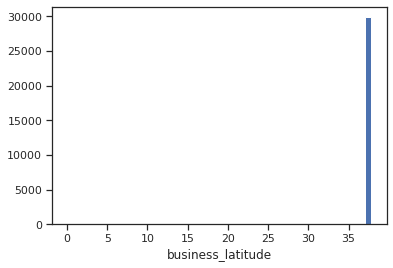

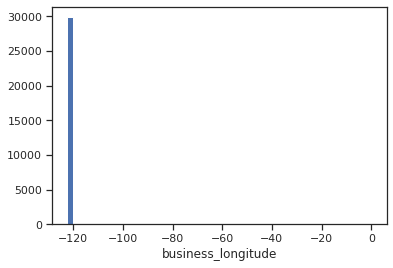

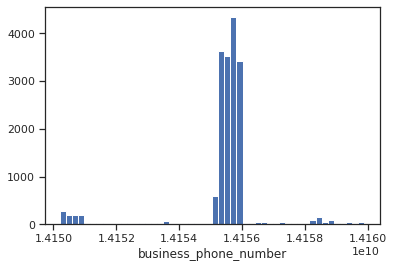

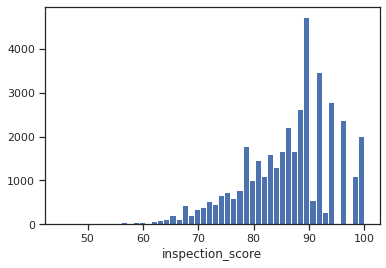

In [0]:
for col in data_num:
    if(data[col].dtype!='O'):
      plt.hist(data[col],50)
      plt.xlabel(col)
      plt.show()

Мы знаем, что столбец postal_code должен быть уникальным для каждого здания, и мы можем заполнить нулевые значения, поэтому мы отбросим этот столбец.

Также в столбцах (business_latitude, business_longitude, business_location) мы не можем предсказать нулевые значения в них, поэтому мы заполняем их нулевыми значениями.
Все столбцы (postal_code, business_latitude, business_longitude, business_location) не имеют такого значения, поскольку столбец business_address не содержит нулевого значения, поэтому мы можем положиться на него при анализе данных вместо этих столбцов.

In [0]:
data_num=data_num.drop(columns='business_postal_code')
temp=data_num['business_latitude'].fillna(0)
temp1=data_num['business_longitude'].fillna(0)
temp2=data_num['business_location'].fillna('---')

In [0]:
data_num[['business_latitude','business_longitude','business_location']]=pd.DataFrame({'business_latitude':temp,'business_longitude':temp1,'business_location':temp2})

In [0]:
data_num

,business_latitude,business_longitude,business_location,business_phone_number,inspection_score,violation_id,violation_description,risk_category
0,0.0,0.0,---,NaN,NaN,69618_20190304_103130,Inadequate sewage or wastewater disposal,Moderate Risk
1,0.0,0.0,---,1.415724e+10,96.0,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk
2,0.0,0.0,---,NaN,88.0,69487_20180418_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk
3,0.0,0.0,---,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,---,NaN,94.0,85987_20180412_103132,Improper thawing methods,Moderate Risk
...,...,...,...,...,...,...,...,...
53968,0.0,0.0,---,1.415596e+10,94.0,80305_20190411_103149,Wiping cloths not clean or properly stored or ...,Low Risk
53969,0.0,0.0,---,NaN,75.0,80233_20190417_103133,Foods not protected from contamination,Moderate Risk
53970,0.0,0.0,---,1.415530e+10,84.0,100216_20190321_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk
53971,0.0,0.0,---,1.415544e+10,83.0,79430_20190418_103109,Unclean or unsanitary food contact surfaces,High Risk


In [0]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param,fillvalue=None):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(missing_values=np.nan,strategy=strategy_param,fill_value=fillvalue)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    data_num[[column]]=data_num_imp
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [0]:
dic={}
for i in data['business_name'].index:
  if ~(data.loc[i,'business_phone_number'] != data.loc[i,'business_phone_number']):
    dic[data.loc[i,'business_name']]=data.loc[i,'business_phone_number']

чтобы заполнить пустые значения столбца business_phone_number, мы сначала заполним его номером той же компании, который доступен в другой строке, и, если он недоступен, мы заполним его нулем.

In [0]:
for i in data['business_name'].index:
  if (data.loc[i,'business_phone_number'] != data.loc[i,'business_phone_number']):
    if data.loc[i,'business_name'] in dic:
      data_num.loc[i,'business_phone_number']=dic[data.loc[i,'business_name']]

In [0]:
test_num_impute_col(data, 'business_phone_number', strategy_param='constant',fillvalue=0)

('business_phone_number', 'constant', 36539, 0.0, 0.0)

In [0]:
test_num_impute_col(data, 'inspection_score', strategy_param='mean')

('inspection_score', 'mean', 14114, 86.23525427130636, 86.23525427130636)

#### **1.2. Обработка пропусков в категориальных данных**

Мы заполняем нулевые значения в столбце protect_id константным значением Not_specified, потому что мы не можем предсказать идентификатор.
Мы заполняем пустые значения в столбцах (protect_description, risk_category) наиболее частыми значениями, предполагая, что такая ситуация встречается чаще всего.

In [0]:
test_num_impute_col(data, 'violation_id', strategy_param='constant',fillvalue='Not_specified')
test_num_impute_col(data, 'violation_description', strategy_param='most_frequent')
test_num_impute_col(data, 'risk_category', strategy_param='most_frequent')

('risk_category', 'most_frequent', 13462, 'Low Risk', 'Low Risk')

**Теперь мы анализируем данные, чтобы все столбцы не имели нулевых значений.**

In [0]:
data_num

,business_latitude,business_longitude,business_location,business_phone_number,inspection_score,violation_id,violation_description,risk_category
0,0.0,0.0,---,0.000000e+00,86.235254,69618_20190304_103130,Inadequate sewage or wastewater disposal,Moderate Risk
1,0.0,0.0,---,1.415724e+10,96.000000,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk
2,0.0,0.0,---,0.000000e+00,88.000000,69487_20180418_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk
3,0.0,0.0,---,0.000000e+00,86.235254,Not_specified,Unclean or degraded floors walls or ceilings,Low Risk
4,0.0,0.0,---,0.000000e+00,94.000000,85987_20180412_103132,Improper thawing methods,Moderate Risk
...,...,...,...,...,...,...,...,...
53968,0.0,0.0,---,1.415596e+10,94.000000,80305_20190411_103149,Wiping cloths not clean or properly stored or ...,Low Risk
53969,0.0,0.0,---,0.000000e+00,75.000000,80233_20190417_103133,Foods not protected from contamination,Moderate Risk
53970,0.0,0.0,---,1.415530e+10,84.000000,100216_20190321_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk
53971,0.0,0.0,---,1.415544e+10,83.000000,79430_20190418_103109,Unclean or unsanitary food contact surfaces,High Risk


In [0]:
data_num.isnull().sum()

business_latitude        0
business_longitude       0
business_location        0
business_phone_number    0
inspection_score         0
violation_id             0
violation_description    0
risk_category            0
dtype: int64

## **2. Преобразование категориальных признаков в числовые**

В нашем наборе данных у нас есть 11 атрибутов типа объекта, которые необходимо преобразовать в числовые значения.

In [0]:
for column in data:
  if (data[column].dtype=='O'):
    print(column,len(data[column].unique()))

business_name 5743
business_address 5646
business_city 1
business_state 1
business_postal_code 63
business_location 2369
inspection_id 24474
inspection_date 807
inspection_type 14
violation_id 35842
violation_description 66
risk_category 4


Мы будем использовать LabelEncoder со столбцами, которые имеют много значений, таких как business_name, business_address, business_location, inspection_id, violation_id.  
С business_city, business_state, inspection_date, inspection_type, violation_description, risk_category, которые не имеют много значений, мы будем использовать Кодирование категорий наборами бинарных значений - one-hot encoding.

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [0]:
le = LabelEncoder()
name_le = le.fit_transform(data['business_name'])
np.unique(name_le)

array([   0,    1,    2, ..., 5740, 5741, 5742])

In [0]:
address_le = le.fit_transform(data['business_address'])
np.unique(address_le)

array([   0,    1,    2, ..., 5643, 5644, 5645])

In [0]:
location_le = le.fit_transform(data_num['business_location'])
np.unique(location_le)

array([   0,    1,    2, ..., 2366, 2367, 2368])

In [0]:
inspection_le = le.fit_transform(data['inspection_id'])
np.unique(inspection_le)

array([    0,     1,     2, ..., 24471, 24472, 24473])

In [0]:
violation_le = le.fit_transform(data_num['violation_id'])
np.unique(violation_le)

array([    0,     1,     2, ..., 35839, 35840, 35841])

In [0]:
ohe = OneHotEncoder()
city_ohe = ohe.fit_transform(data[['business_city']])
print(city_ohe.shape)
city_ohe.toarray()[0:3]

(53973, 1)


array([[1.],
       [1.],
       [1.]])

In [0]:
state_ohe = ohe.fit_transform(data[['business_state']])
print(state_ohe.shape)
state_ohe.toarray()[0:3]

(53973, 1)


array([[1.],
       [1.],
       [1.]])

In [0]:
inspection_date_ohe = ohe.fit_transform(data[['inspection_date']])
print(inspection_date_ohe.shape)
inspection_date_ohe.toarray()[0:3]

(53973, 807)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
inspection_type_ohe = ohe.fit_transform(data[['inspection_type']])
print(inspection_type_ohe.shape)
inspection_type_ohe.toarray()[0:3]

(53973, 14)


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [0]:
violation_description_ohe = ohe.fit_transform(data_num[['violation_description']])
print(violation_description_ohe.shape)
violation_description_ohe.toarray()[0:3]

(53973, 65)


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]])

In [0]:
risk_category_ohe = ohe.fit_transform(data_num[['risk_category']])
print(risk_category_ohe.shape)
risk_category_ohe.toarray()[0:3]

(53973, 3)


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

Теперь у нас есть все категориальные данные как числовые после того, как мы их закодировали. Теперь мы можем применять алгоритмы машинного обучения, которые принимают только числовые данные.

## **3. Масштабирование данных**

In [0]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

 #### **3.1. MinMax масштабирование**

In [0]:
mm = MinMaxScaler()
business_id_mm = mm.fit_transform(data[['business_id']])

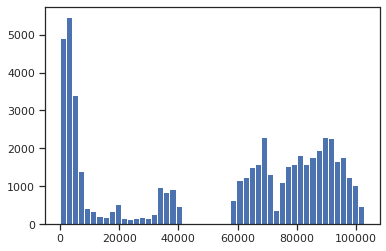

In [0]:
plt.hist(data['business_id'], 50)
plt.show()

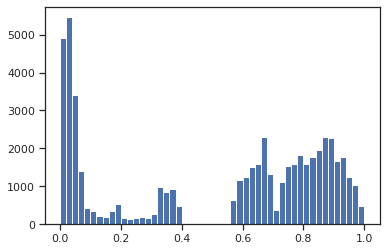

In [0]:
plt.hist(business_id_mm, 50)
plt.show()

 #### **3.2. Масштабирование данных на основе Z-оценки - StandardScaler**

In [0]:
sc = StandardScaler()
inspection_score_sc = sc.fit_transform(data[['inspection_score']])

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


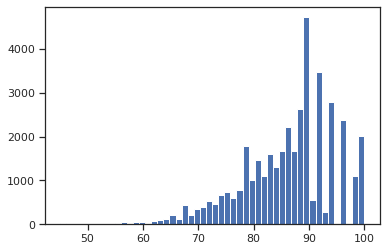

In [0]:
plt.hist(data['inspection_score'], 50)
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


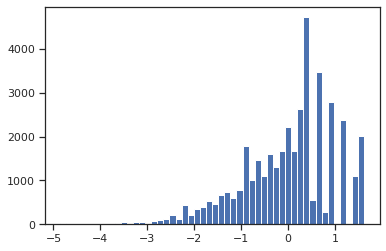

In [0]:
plt.hist(inspection_score_sc, 50)
plt.show()